# Modelos: Deep Factorization Machine (DeepFM)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
BASE_PATH = '../..'
LIB_PATH  = f'{BASE_PATH}/lib'

In [3]:
import sys
sys.path.append(LIB_PATH)

import pandas as pd
from bunch import Bunch

import torch
import pytorch_common
import pytorch_common.util as pu

import model as ml
import service as srv

import util as ut

from sklearn.model_selection import train_test_split

2023-09-02 12:15:24.773541: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


<Figure size 640x480 with 0 Axes>

## Setup

In [4]:
pu.LoggerBuilder().on_console().build()

<RootLogger root (INFO)>

In [5]:
import pytorch_common
pytorch_common.__version__

'0.3.2'

In [6]:
torch.__version__

'2.0.1+cu118'

In [7]:
pu.set_device_name('gpu')

pu.get_device(), torch.cuda.is_available()

(device(type='cuda', index=0), True)

In [8]:
ut.set_seed(42)

## Carga de dataset

In [9]:
model_loader = model_loader = srv.DeepFMLoader(
    weights_path = f'{BASE_PATH}/weights',
    metrics_path = f'{BASE_PATH}/metrics/deep-gmf',
    tmp_path     = f'{BASE_PATH}/tmp'
)

service = srv.ModulePredictionService(model_loader)

In [11]:
dataset  = pd.read_json("/var/tmp/rec-sys-client/fetch_interactions.json")


dev_set, test_set = train_test_split(dataset, test_size=0.2, shuffle=True)

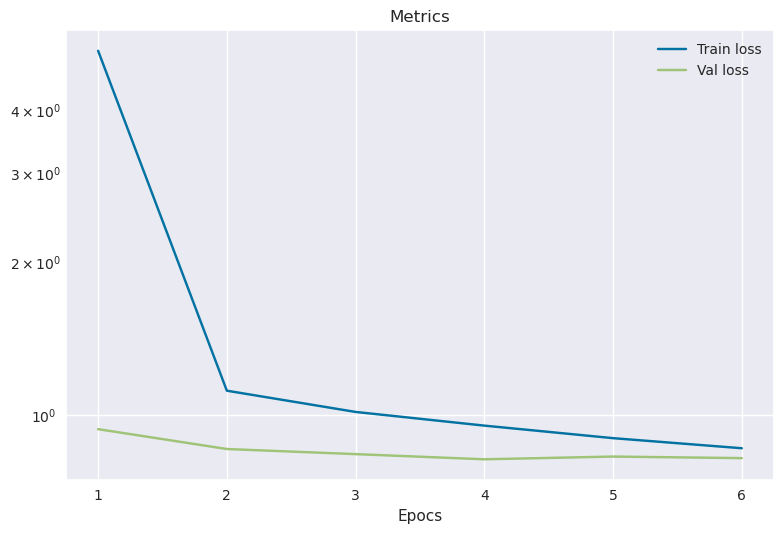

2023-09-02 12:15:49,124 - INFO - {'time': '0:00:01.76', 'epoch': 7, 'train_loss': 0.8200212484858569, 'val_loss': 0.8253727555274963, 'lr': 0.001}


Processing:   0%|          | 0/250 [00:00<?, ?it/s]

Ordered by mAP@5(4,5):


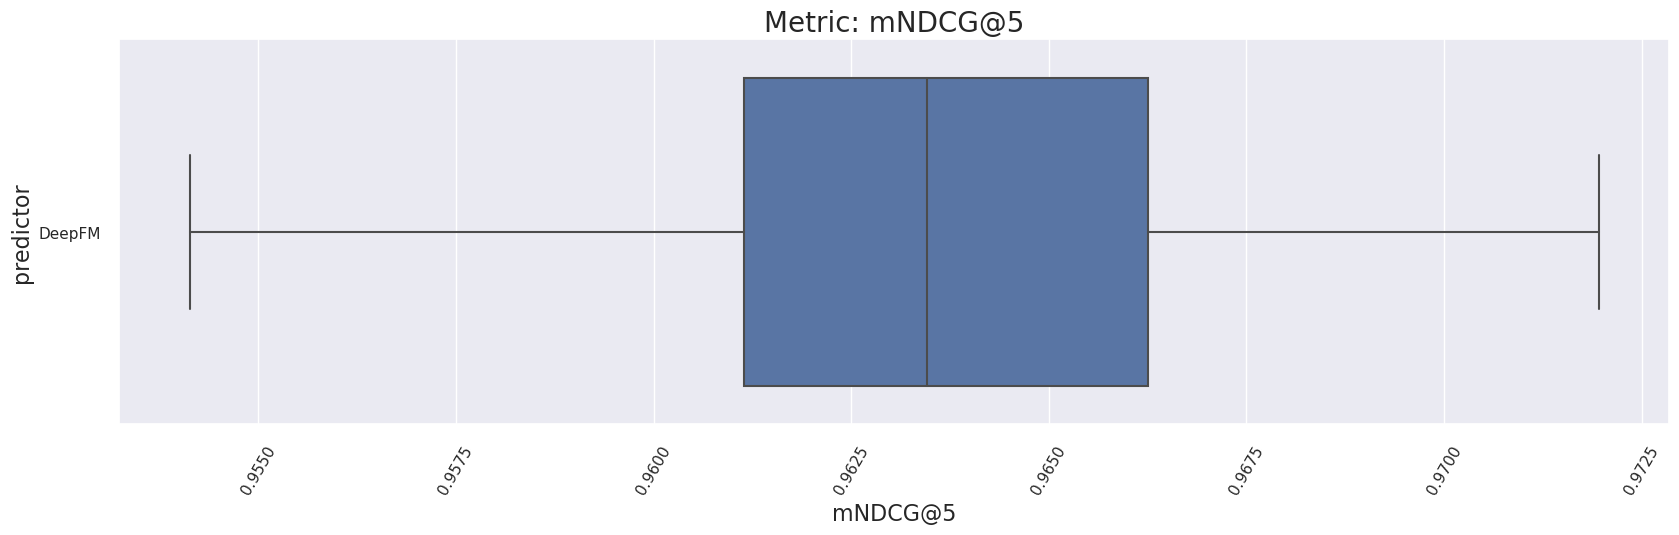

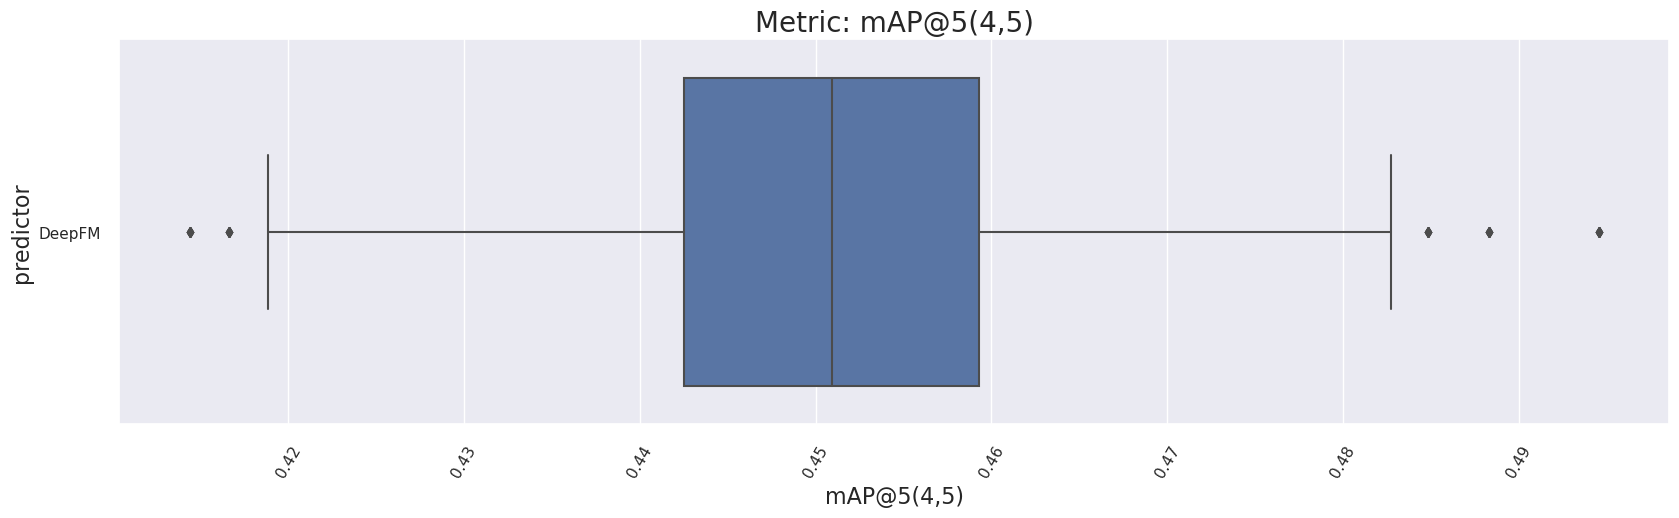

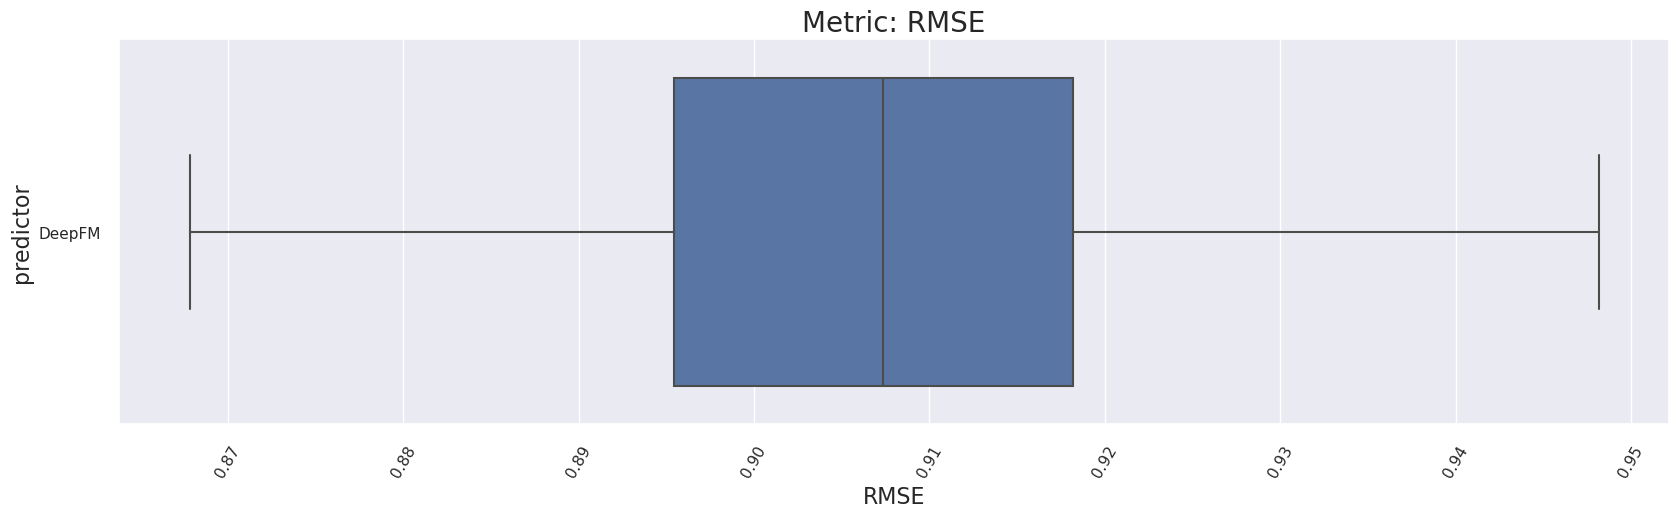

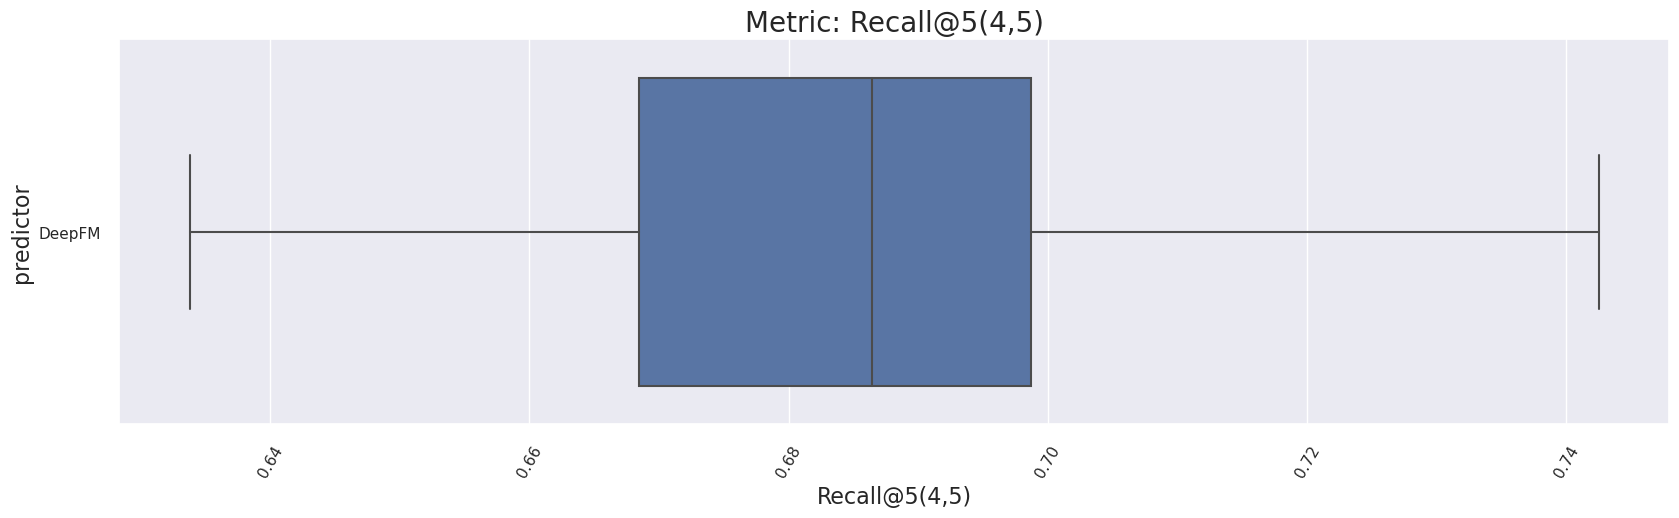

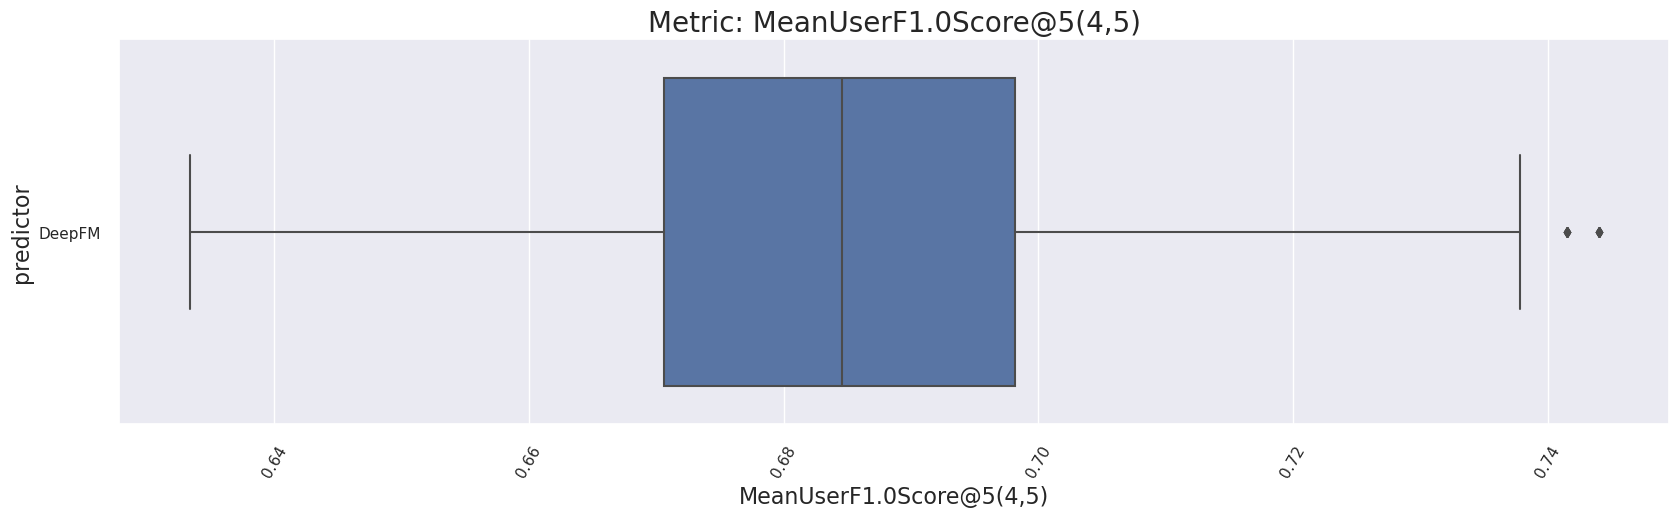

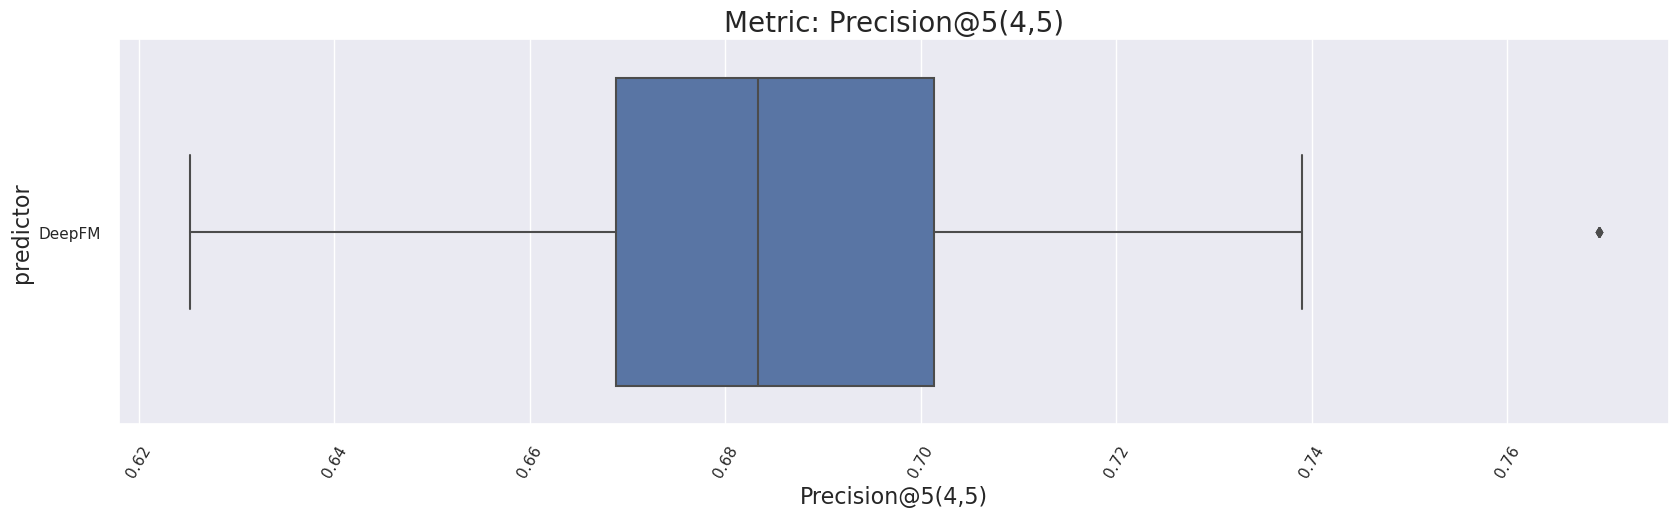

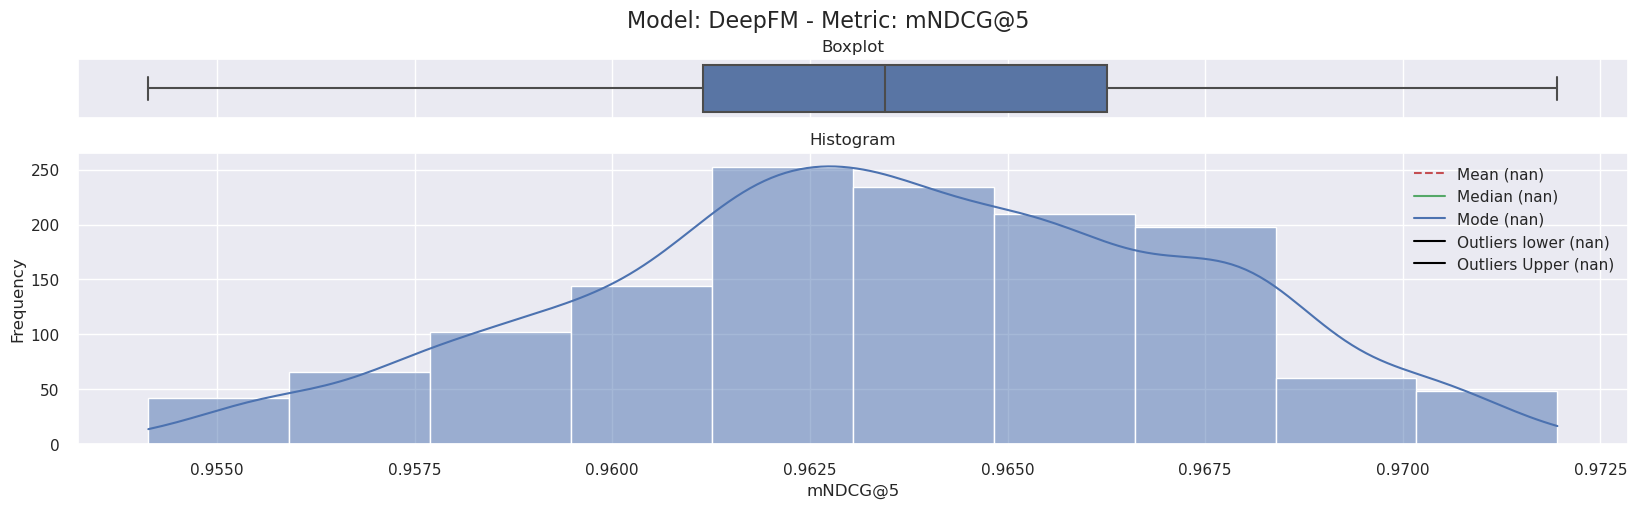

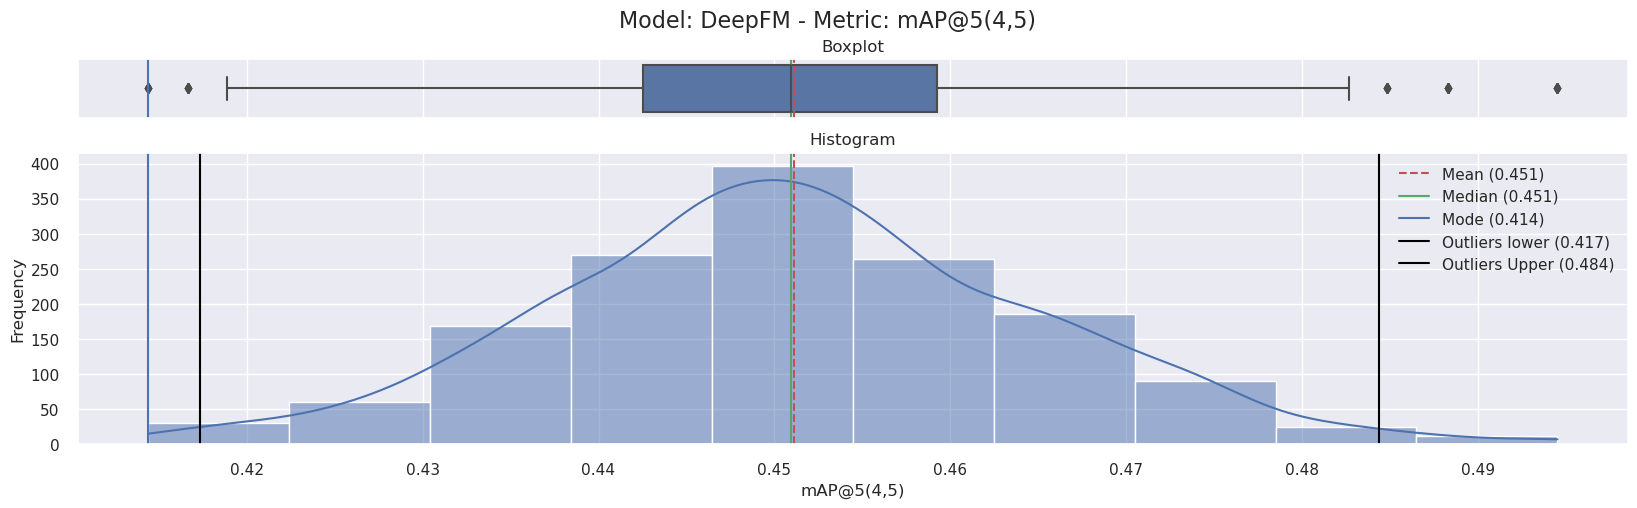

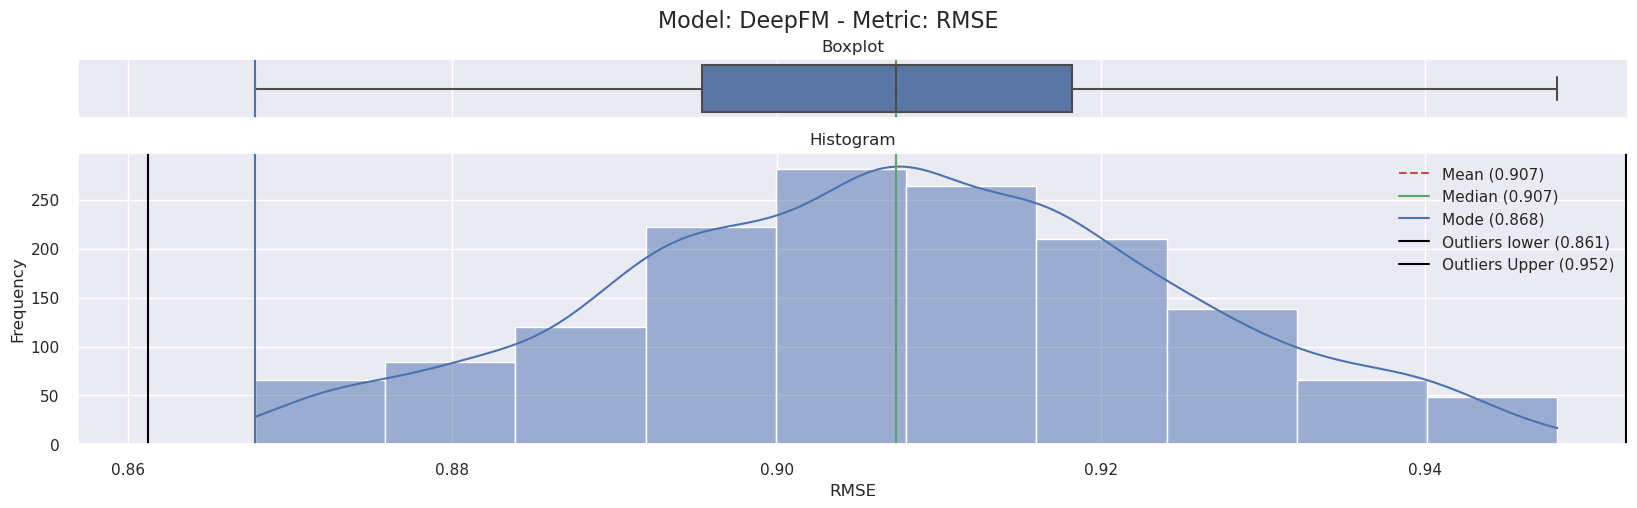

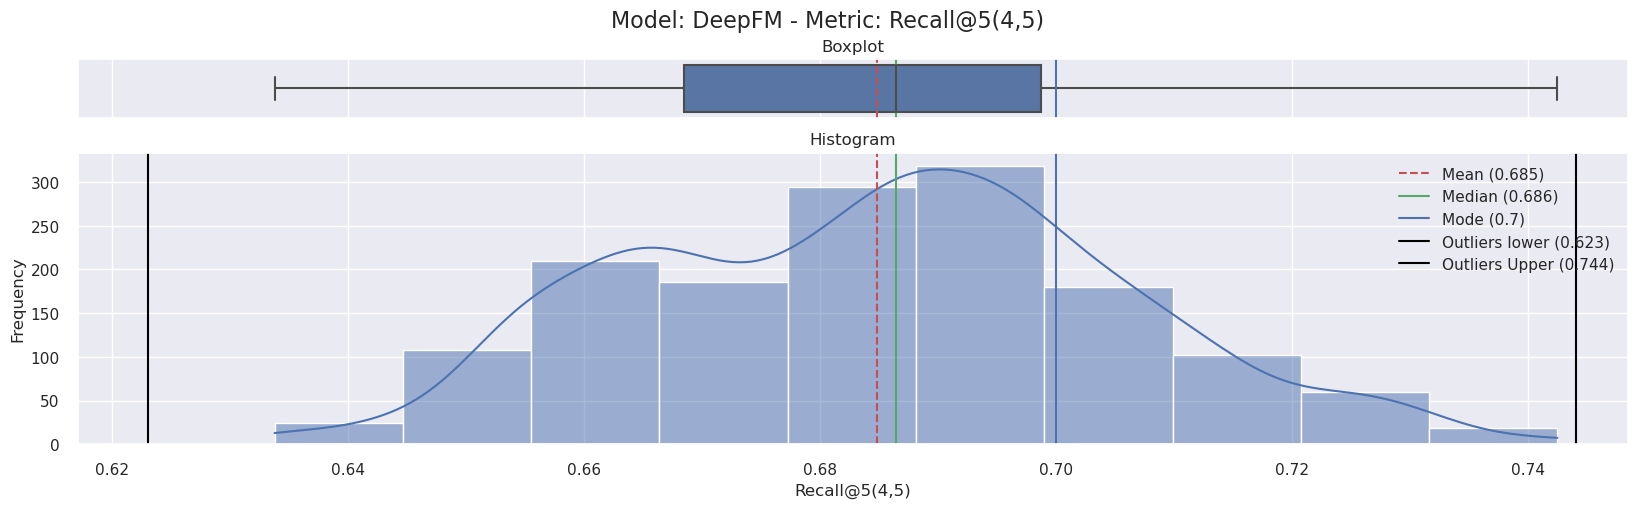

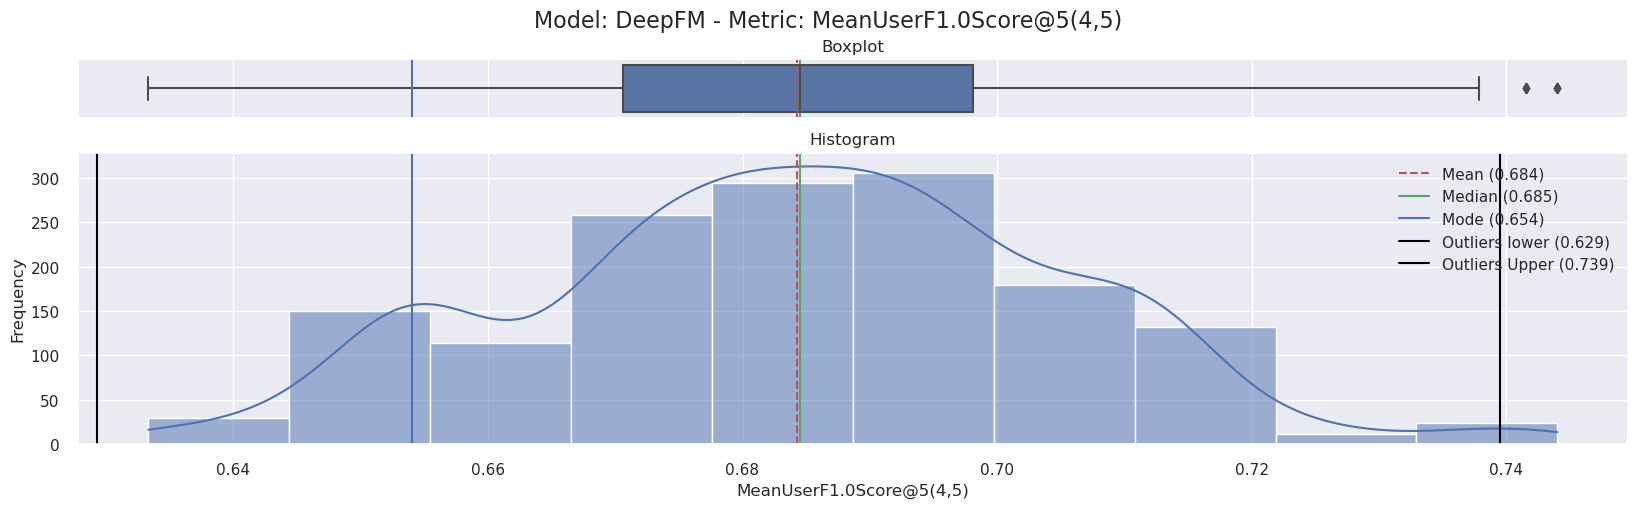

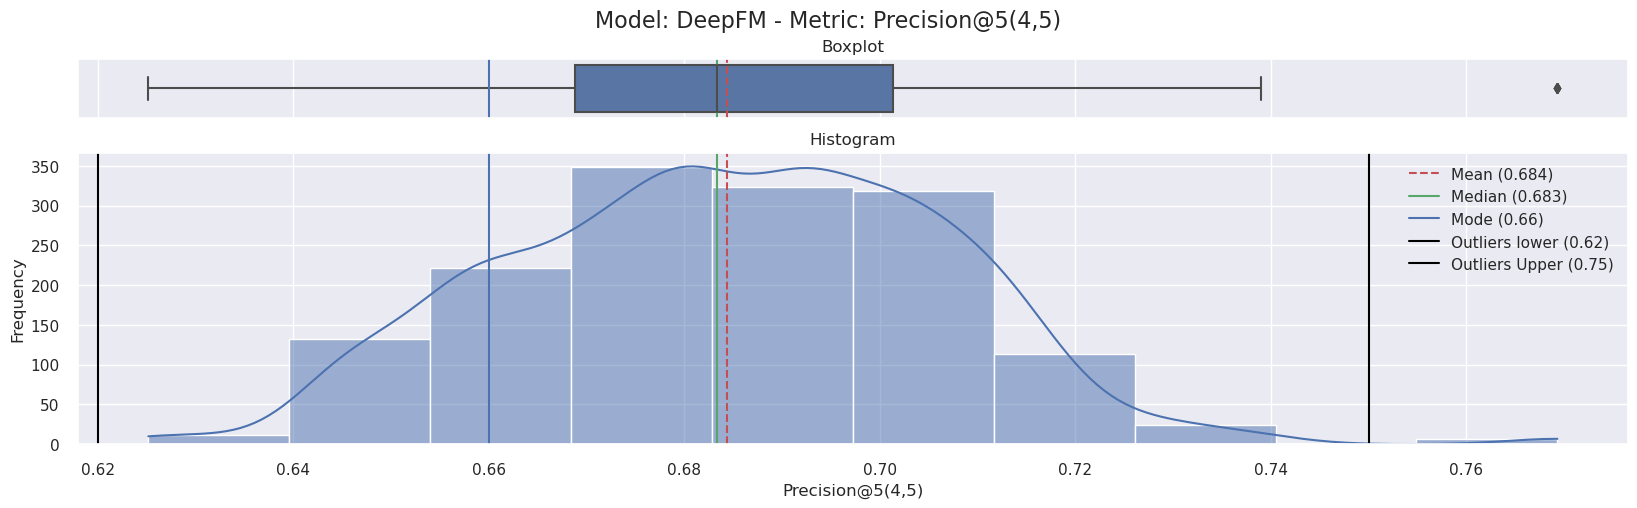

In [12]:
test_set = service.predict(dev_set, test_set)

In [13]:
test_set

,user_id,item_id,rating,suitable_to_train,user_seq,item_seq,rating_prediction
5573,94,587,3.0,True,91,144,3.085731
24775,425,34,3.5,True,421,93,3.172723
15140,266,1374,3.0,True,262,300,3.818637
18937,322,46578,4.5,True,318,330,3.298032
23314,393,3793,5.0,True,389,167,3.512354
...,...,...,...,...,...,...,...
341,10,4995,4.0,True,8,175,3.457345
801,18,5956,4.0,True,16,211,3.301555
30752,524,1266,5.0,True,519,48,4.349879
4891,82,2012,4.0,True,79,208,3.503032
